In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN, KMeans
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import silhouette_score, accuracy_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from keras import backend as K 
from unidecode import unidecode
import optuna
pd.set_option('display.max_columns', None)
import warnings 
import re
warnings.filterwarnings('ignore')
from langdetect import detect 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from transformers import pipeline
import spacy
import nltk
import spacy
nlp_en = spacy.load('en_core_web_sm')
nltk.download('vader_lexicon')
nltk.download('stopwords')
import os
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aladelca/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aladelca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
os.chdir('/Users/aladelca/Library/CloudStorage/OneDrive-McGillUniversity/MMA/Data mining and visualization/group_assignment/repo/INSY_662_MMA')

## Clustering

In [3]:
## Modelling

data = pd.read_excel('clean_songs_en_fr_sp.xlsx')
data.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,en,0.141837,0.752551
1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,en,-0.067330,0.678125
2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,en,-0.036364,0.630303
3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,en,0.259333,0.536667
4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,en,0.177059,0.499412


In [4]:
### Standarization

CLUSTER_VARS = ['liveness','acousticness','energy','instrumentalness','loudness','speechiness','tempo','duration','danceability']

esc = StandardScaler()

data_esc = esc.fit_transform(data[CLUSTER_VARS])




In [5]:
### Clustering

inertias = []
silhouettes = []
for i in np.arange(2,21):
    model = KMeans(n_clusters=i)
    model.fit(data_esc)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(data_esc, model.labels_))
    #data['cluster_kmeans'] = model.labels_

<Axes: >

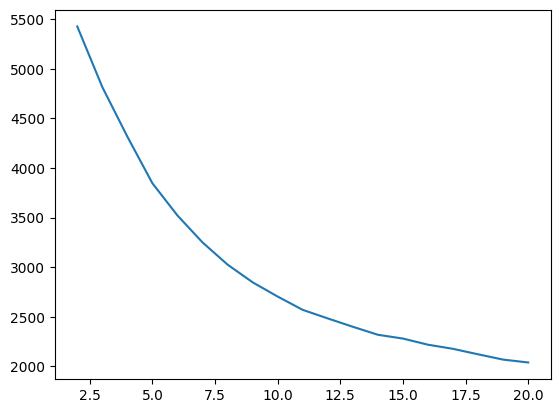

In [6]:
sns.lineplot(x = np.arange(2,21), y = np.array(inertias))

<Axes: >

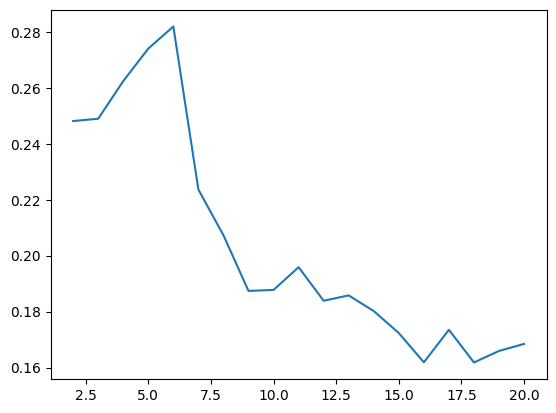

In [7]:
sns.lineplot(x = np.arange(2,21), y = silhouettes)

In [8]:
### Number of clusters 

n = 6

model = KMeans(n_clusters=6)
model.fit(data_esc)
data['kmeans_cluster'] = model.labels_

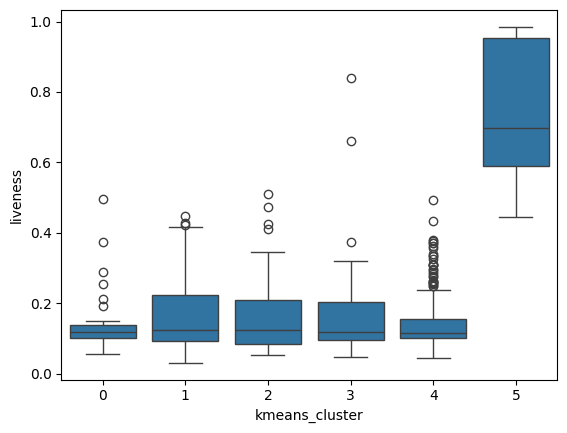

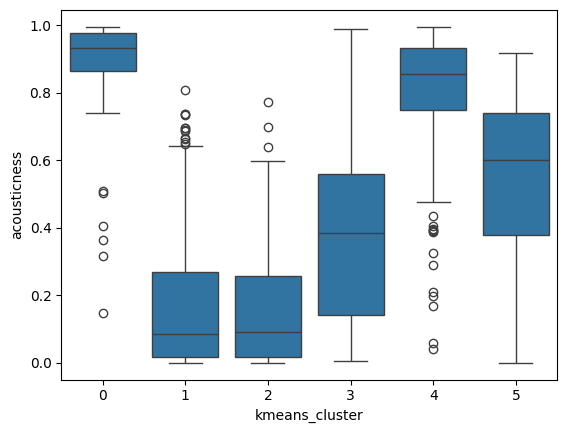

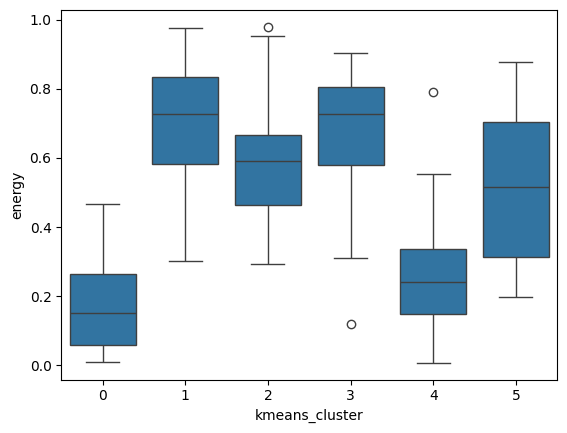

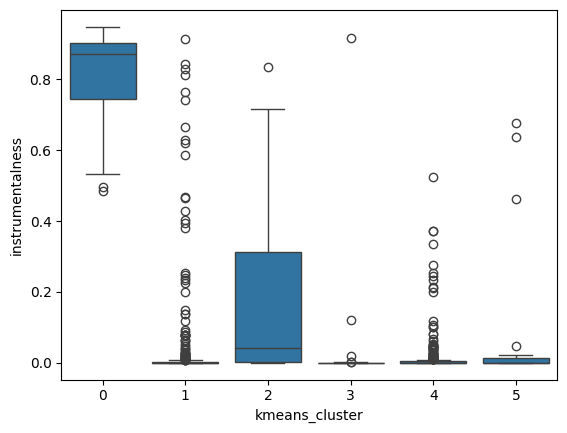

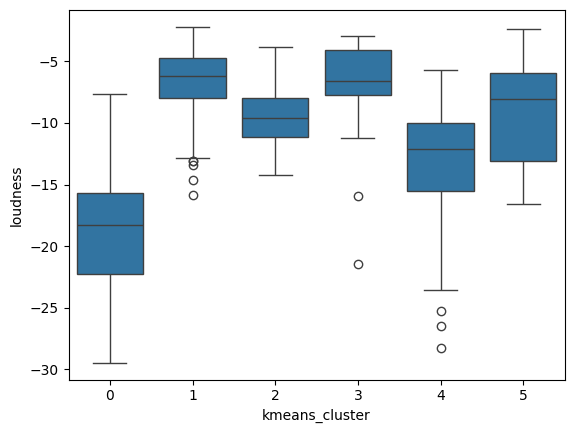

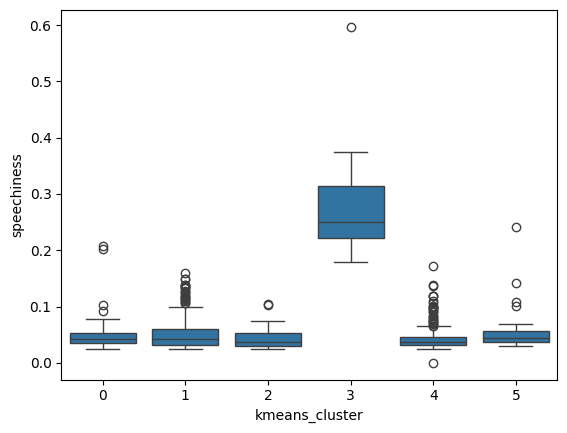

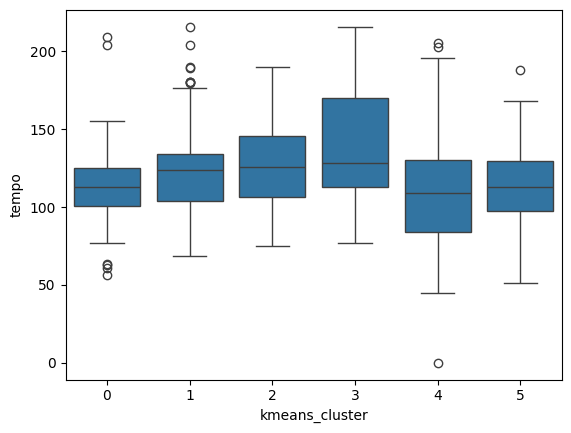

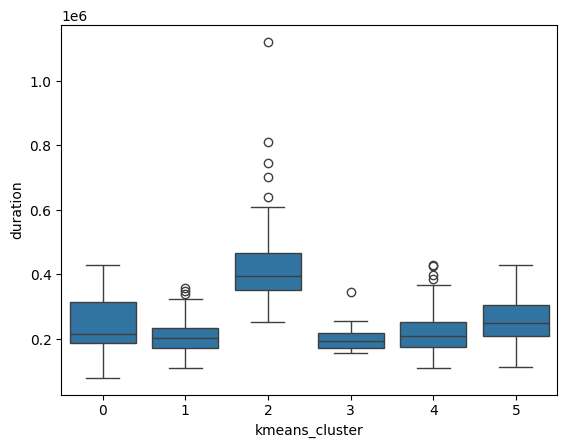

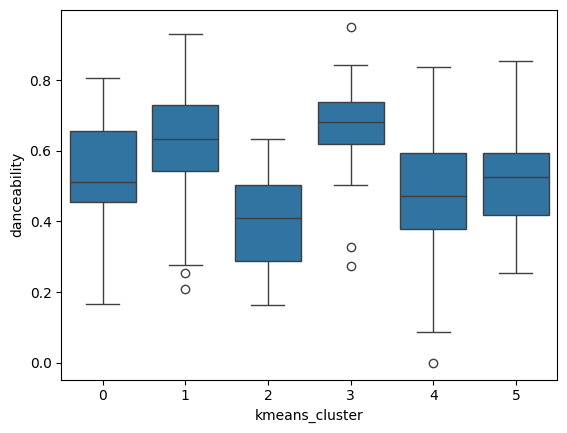

In [9]:
for i in CLUSTER_VARS:
    sns.boxplot(y = data[i], x = data['kmeans_cluster'])
    plt.show()

In [10]:
### Songs

data[data['kmeans_cluster']==5]

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity,kmeans_cluster
8,1r8qywTSOGQvFxQnzcyiBj,One More Light - One More Light Live,Linkin Park,259386,48,0.254,0.644000,0.298,0.000043,0.985,-12.873,0.0334,168.253,0.0883,en,0.285833,0.652500,5
44,6mFkJmJqdDVQ1REhVfGgd1,Wish You Were Here,Pink Floyd,334743,77,0.481,0.735000,0.262,0.011400,0.832,-15.730,0.0414,122.861,0.3750,en,0.040909,0.558081,5
179,4OYOCRaALWPVbC2IvcXgqc,Quiet Nights of Quiet Stars - Live,Stacey Kent,333173,0,0.564,0.918000,0.280,0.047000,0.683,-16.137,0.0361,111.280,0.2850,en,-0.016000,0.505333,5
207,5nob1CyQfl1KaMEPVQyxkO,Evening Faces,Michael Brecker,430544,0,0.428,0.808000,0.536,0.676000,0.552,-7.594,0.0387,110.051,0.1940,en,0.056926,0.473877,5
235,0iaRmBpdBoJbn29IHxQ3rh,You'll Never Know - Live,Michael Bublé,268266,26,0.328,0.738000,0.253,0.009720,0.982,-15.304,0.0488,60.610,0.1490,en,0.375000,0.525000,5
278,1CZ0JP3v4x1k1Kjrvvd0xa,New York State of Mind,Tony Bennett,400453,21,0.369,0.640000,0.764,0.000009,0.976,-5.679,0.0627,111.015,0.3150,en,0.110544,0.401956,5
279,3seDctdI8WJlgbCzoCCIgh,I Can't Give You Anything but Love,Rufus Wainwright,389013,12,0.311,0.779000,0.329,0.000040,0.979,-8.753,0.0359,51.346,0.0931,en,0.317917,0.564444,5
287,5G48UeHatQc9ALlaZ5FAtF,I Just Can't Help Believin' - Live,Elvis Presley,278760,0,0.478,0.509000,0.318,0.000004,0.983,-13.774,0.0386,141.561,0.3210,en,0.129415,0.446860,5
333,0Q1pP8RH1RGsUSnU0PFg6D,It Might As Well Be Spring,Ella Fitzgerald,160373,0,0.296,0.747000,0.207,0.000000,0.554,-11.427,0.0304,84.960,0.3690,en,0.020606,0.397576,5
398,5NnsMU6yw14MdvVgiOljQ1,I Can't Say No,Natalie Cole,212693,0,0.499,0.600000,0.470,0.000002,0.445,-7.505,0.0483,124.602,0.4970,en,0.287500,0.798611,5


## Predicting song's mood

In [19]:
data = pd.read_excel('clean_songs_en_fr_sp.xlsx')
data.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,en,0.141837,0.752551
1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,en,-0.067330,0.678125
2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,en,-0.036364,0.630303
3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,en,0.259333,0.536667
4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,en,0.177059,0.499412


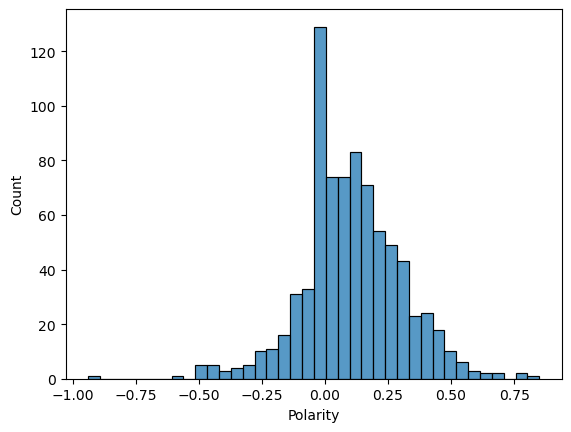

0.85


,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity
401,2IhTNWQ9sFAr4WsfDpIy4s,Inseparable,Natalie Cole,149106,0,0.443,0.8550,0.194,0.000125,0.1800,-12.644,0.0366,125.145,0.258,en,0.80,0.833333
462,5M4yti0QxgqJieUYaEXcpw,Eventually,Tame Impala,318591,78,0.424,0.0158,0.615,0.000389,0.0844,-6.217,0.0325,77.935,0.155,en,0.80,1.000000
633,4Jn1rVpnfFfpuSBLDTNJv8,Proclamation,Gentle Giant,416866,39,0.514,0.1110,0.427,0.008120,0.1270,-14.254,0.0717,115.120,0.371,en,0.85,0.600000


In [20]:
sns.histplot(data['Polarity'])
plt.show()
print(data['Polarity'].max())

data[data['Polarity']>0.70]

In [21]:
## Creating dependent variables

bins = pd.IntervalIndex.from_tuples([
    (-1, -0.67),
    (-0.67, -0.34),
    (-0.34, 0),
    (0, 0.33),
    (0.33, 0.66),
    (0.66, 1)
])
n = len(bins)
data['sentiment'] = pd.cut(data['Polarity'],bins)

In [22]:
enc = OrdinalEncoder()
data['sentiment'] = enc.fit_transform(data[['sentiment']])[:,0]
data = data.drop(['language'], axis = 1)

In [23]:
original_data = pd.read_excel('data/dataset.xlsx')

delete_text_before_lyrics = lambda x: x[x.find("Lyrics") + len("Lyrics"):] if x.find("Lyrics") != -1 else x

original_data['lyrics'] = original_data['lyrics'].apply(delete_text_before_lyrics)

original_data['language'] = original_data['lyrics'].apply(detect)  # Detect the language

original_data.head()

,Unnamed: 0,id,name,artist,disc,duration,episode,explicit,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lyrics,language
0,0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,1,233280,False,False,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,1,0.0295,109.001,4,0.187,"When you feel you're alone, cut off from this ...",en
1,1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,1,142973,False,False,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,1,0.0261,74.984,4,0.222,"\nTurn away\nIf you could, get me a drink\nOf ...",en
2,2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,1,229120,False,False,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,1,0.0278,76.426,4,0.118,\nA heart that's full up like a landfill\nA jo...,en
3,3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,1,186480,False,True,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,1,0.1230,179.722,4,0.255,"\n\nWell, if you wanted honesty\nThat's all yo...",en
4,4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,1,278586,False,False,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,1,0.0525,73.019,4,0.327,"\nShe sits up high, surrounded by the sun\nOne...",en


In [24]:
data_pre = data.merge(original_data[['id','lyrics','language']], how = 'left', on = ['id'])
data_pre = data_pre.drop_duplicates()

data_pre = data_pre[data_pre['language'].isin(['es','en','fr'])]

data_pre['lyrics'] = data_pre['lyrics'].astype(str).str.lower()
data_pre['lyrics'] = data_pre['lyrics'].apply(unidecode)
regexp = RegexpTokenizer('\w+')

data_pre['lyrics_token'] = data_pre['lyrics'].apply(regexp.tokenize)
data_pre.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Polarity,Subjectivity,sentiment,lyrics,language,lyrics_token
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,0.141837,0.752551,3.0,"when you feel you're alone, cut off from this ...",en,"[when, you, feel, you, re, alone, cut, off, fr..."
2,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,-0.067330,0.678125,2.0,"\nturn away\nif you could, get me a drink\nof ...",en,"[turn, away, if, you, could, get, me, a, drink..."
4,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,-0.036364,0.630303,2.0,\na heart that's full up like a landfill\na jo...,en,"[a, heart, that, s, full, up, like, a, landfil..."
6,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,0.259333,0.536667,3.0,"\n\nwell, if you wanted honesty\nthat's all yo...",en,"[well, if, you, wanted, honesty, that, s, all,..."
8,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,0.177059,0.499412,3.0,"\nshe sits up high, surrounded by the sun\none...",en,"[she, sits, up, high, surrounded, by, the, sun..."


In [25]:


def tokenizing(data):
    stopwords_en = nltk.corpus.stopwords.words("english")
    stopwords_es = nltk.corpus.stopwords.words("spanish")
    stopwords_fr = nltk.corpus.stopwords.words("french")
    data_en = data[data['language']=='en']
    data_en['lyrics_token'] = data_en['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords_en])
    data_es = data[data['language']=='es']
    data_es['lyrics_token'] = data_es['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords_es])
    data_fr = data[data['language']=='fr']
    data_fr['lyrics_token'] = data_fr['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords_fr])
    final = pd.concat([data_en,data_es, data_fr], axis = 0)
    return final

In [26]:
data_token = tokenizing(data_pre)

lemmatizer = WordNetLemmatizer()
data_token['lyrics_token'] = data_token['lyrics_token'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
data_token['lyrics'] = data_token['lyrics_token'].apply(lambda x: ' '.join([item for item in x]))

pattern = r'[0-9]'

# Match all digits in the string and replace them with an empty string
def replace_numbers(x):
    new_string = re.sub(pattern, '', x)
    return new_string
data_token['lyrics'] = data_token['lyrics'].apply(replace_numbers)
data_token.head()

,id,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Polarity,Subjectivity,sentiment,lyrics,language,lyrics_token
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,0.141837,0.752551,3.0,feel alone cut cruel world instinct telling ru...,en,"[feel, alone, cut, cruel, world, instinct, tel..."
2,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,-0.067330,0.678125,2.0,turn away could get drink water cause lip chap...,en,"[turn, away, could, get, drink, water, cause, ..."
4,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,-0.036364,0.630303,2.0,heart full like landfill job slowly kill bruis...,en,"[heart, full, like, landfill, job, slowly, kil..."
6,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,0.259333,0.536667,3.0,well wanted honesty say never want let go bett...,en,"[well, wanted, honesty, say, never, want, let,..."
8,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,0.177059,0.499412,3.0,sits high surrounded sun one million branch lo...,en,"[sits, high, surrounded, sun, one, million, br..."


In [27]:
VARS = ['artist','duration','danceability','acousticness','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','language','lyrics']
TARGET = ['sentiment']

x = data_token[VARS]
y = data_token[TARGET]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=123)
y_train = np.array(y_train, dtype=int) 
y_test = np.array(y_test, dtype=int) 
x_train = x_train.rename(columns = {'artist':'artist_song'})
x_test = x_test.rename(columns = {'artist':'artist_song'})

In [28]:
#### Handling text

vect = TfidfVectorizer(max_features = 1000,ngram_range=(1,3))
x_train_lyrics = pd.DataFrame(vect.fit_transform(x_train['lyrics']).toarray(), columns  = vect.get_feature_names_out(), index = x_train.index)
x_test_lyrics = pd.DataFrame(vect.transform(x_test['lyrics']).toarray(), columns  = vect.get_feature_names_out(), index = x_test.index)

x_train_final = pd.concat([x_train, x_train_lyrics], axis = 1)
x_test_final = pd.concat([x_test, x_test_lyrics], axis = 1)



In [29]:
EXCLUDED_VARS = ['lyrics']
x_train_df = x_train_final.loc[:,~x_train_final.columns.isin(EXCLUDED_VARS)]
x_test_df = x_test_final.loc[:,~x_test_final.columns.isin(EXCLUDED_VARS)]
x_train_df.head()

,artist_song,duration,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,able,across,act,action,actually,age,ago,ah,ah ah,ah ah ah,air,alabama,alan,album,alive,almost,alone,along,already,alright,also,also like,also likeembed,always,america,american,among,amor,angel,angela,another,answer,anyone,anything,ap,apart,april,april th,arm,around,art,artist,as,aseptember,aseptember aseptember,ask,asked,attention,august,august th,away,away give,away give away,ay,ba,ba ba,ba ba ba,baby,back,bad,bag,ball,band,bank,bar,beach,bear,beat,beatles,beautiful,beauty,bebe,became,become,bed,begala,began,begin,behind,believe,bell,best,better,beyond,bien,big,bill,bird,bit,bitch,black,blood,bloody,bloom,blow,blue,bob,body,bone,book,born,box,boy,brain,break,breath,bridge,bright,bring,broke,broken,brother,brought,brown,business,buy,bye,ca,caesar,call,call call,called,calling,came,cannot,captain,car,care,carlson,carti,case,cash,cat,caught,cause,certain,chair,chance,change,check,cheek,child,chris,chuck,city,clarence,class,classic,clean,clear,cliff,close,clothes,club,coffee,cold,cole,come,coming,comme,common,control,cool,corner,could,country,country singer,course,court,cover,crazy,creator,cried,crosstalk,crowd,cry,cut,da,da da,da da da,dad,daddy,damn,dan,dance,dancing,dark,dat,daughter,david,day,de,dead,deal,dear,death,december,decent,decent strong,deep,del,desire,devil,diamond,dick,die,died,dientes,different,dinner,dirty,disco,dj,doctor,dog,done,door,dr,drake,dream,dress,drink,drive,drop,drunk,du,du du,du du du,dude,dum,ear,early,earn,earth,east,easy,eat,ed,eh,either,el,elliot,else,em,embed,end,english,enough,ep,etait,etre,even,evening,ever,every,everybody,everyone,everything,everywhere,experience,ey,eye,face,fact,fair,fait,fall,falling,family,famous,far,fast,father,fear,feat,feat joel,feat joel sattler,february,february th,feel,feel like,feeling,fellow,felt,field,fight,find,fine,finger,fire,first,five,floor,flow,flower,floyd,fly,food,fool,foot,force,forever,forget,form,found,four,free,french,fresh,friday,friend,front,ft,fuck,fuckin,full,fun,future,game,garden,gatsby,gave,general,gentleman,george,get,getting,ghost,gillis,girl,give,give away,give away give,given,glass,go,go go,god,goin,going,gold,golden,gone,gonna,good,goodbye,got,gotta,grand,great,greatest,green,ground,group,guess,gun,guy,ha,hair,half,hall,hand,happen,happened,happy,hard,harlem,hat,hate,head,hear,heard,heart,heaven,heavy,held,hell,hello,help,hey,high,hill,hip,hip hop,history,hit,ho,hold,holding,hole,holiday,holy,home,honey,hop,hope,horror,horse,hot,hotel,hour,house,however,human,hundred,hurt,ice,idea,ii,indeed,infinity,inside,int,island,jack,jackson,james,january,january rd,january st,january th,jay,jazz,jimmy,job,joe,joel,joel sattler,john,jones,jordan,joy,judge,july,july th,june,june th,kanye,kanye west,keep,kendrick,kendrick lamar,key,kid,kill,kind,king,kiss,knee,knew,know,known,la,la la,la la la,lady,lamar,land,language,lars,last,late,later,laugh,laughter,lawrence,le,leaf,least,leave,leaving,led,lee,left,leg,let,let go,letter,li,lie,life,light,light decent,like,likeembed,lil,line,lip,listen,listening,little,live,liveget,liveget ticket,liveget ticket low,living,lonely,long,look,look like,looked,looking,lord,lose,lost,lot,lou,loud,love,love love,love love love,loved,lovely,lover,low,low you,low you might,lucky,lyric,ma,mac,macbeth,machine,mad,made,magic,main,make,making,malachy,man,manner,many,mar,march,march th,margaret,mark,master,matter,max,may,may th,maybe,mean,meant,meet,meme,memory,men,met,michael,middle,midnight,might,might also,might also like,might also likeembed,mike,mile,milk,miller,million,mind,mine,minute,miranda,miss,mma,modern,moment,money,monster,month,moon,morel,morning,mother,motion,mountain,mouth,move,movement,mr,mr bloom,much,murder,music,must,na,na na,na na na,name,named,nature,nd,near,need,negro,never,new,new york,next,nice,night,nobody,noche,norma,north,note,nothing,november,nowhere,number,ocean,october,october th

In [63]:
### Modeling
params = {'iterations': 1786, 'depth': 9, 'learning_rate': 0.29666741441737854}
CAT_VARS = ['artist_song','language']
x_train_df[CAT_VARS] = x_train_df[CAT_VARS].astype('category')
x_test_df[CAT_VARS] = x_test_df[CAT_VARS].astype('category')
model = CatBoostClassifier(cat_features=CAT_VARS, **params)
model_lgbm = lgb.LGBMClassifier(categorical_feature = CAT_VARS)
model_xgb = XGBClassifier(enable_categorical=True)
model_rf = RandomForestClassifier(random_state=123)
model_xgb.fit(x_train_df, y_train)
model_lgbm.fit(x_train_df, y_train)
model.fit(x_train_df, y_train)
model_rf.fit(x_train_df.loc[:,~x_train_df.columns.isin(CAT_VARS)], y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] categorical_feature is set=artist_song,language, categorical_column=0,11 will be ignored. Current value: categorical_feature=artist_song,language
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18697
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 849
[LightGBM] [Info] Start training from score -6.386879
[LightGBM] [Info] Start training from score -3.901973
[LightGBM] [Info] Start training from score -1.177393
[LightGBM] [Info] Start training from score -0.606136
[LightGBM] [Info] Start training from score -2.138384
[LightGBM] [Info] Start training from score -5.000585
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

RandomForestClassifier(random_state=123)

In [64]:
esc = StandardScaler()
x_train_esc = esc.fit_transform(x_train_df.loc[:,~x_train_df.columns.isin(CAT_VARS)])
x_test_esc = esc.transform(x_test_df.loc[:,~x_test_df.columns.isin(CAT_VARS)])
model_nn = MLPClassifier()
model_nn.fit(x_train_esc, y_train)


MLPClassifier()

In [66]:
preds_catboost = model.predict(x_test_df)
preds_probas_catboost = model.predict_proba(x_test_df)
preds_probas_train_catboost = model.predict_proba(x_train_df)

preds_lgbm = model_lgbm.predict(x_test_df)
preds_probas_lgbm = model_lgbm.predict_proba(x_test_df)
preds_probas_train_lgbm = model_lgbm.predict_proba(x_train_df)

preds_xgb = model_xgb.predict(x_test_df)
preds_probas_xgb = model_xgb.predict_proba(x_test_df)
preds_probas_train_xgb = model_xgb.predict_proba(x_train_df)

preds_rf = model_rf.predict(x_test_df.loc[:,~x_test_df.columns.isin(CAT_VARS)])
preds_probas_rf = model_rf.predict_proba(x_test_df.loc[:,~x_test_df.columns.isin(CAT_VARS)])
preds_probas_train_rf = model_rf.predict_proba(x_train_df.loc[:,~x_train_df.columns.isin(CAT_VARS)])

preds_nn  = model_nn.predict(x_test_esc)
preds_probas_nn  = model_nn.predict_proba(x_test_esc)
preds_probas_train_rf = model_nn.predict_proba(x_train_esc)

print(accuracy_score(preds_catboost, y_test))
print(accuracy_score(preds_lgbm, y_test))
print(accuracy_score(preds_xgb, y_test))
print(accuracy_score(preds_rf, y_test))
print(accuracy_score(preds_nn, y_test))

0.6934673366834171
0.6683417085427136
0.6884422110552764
0.6834170854271356
0.6733668341708543


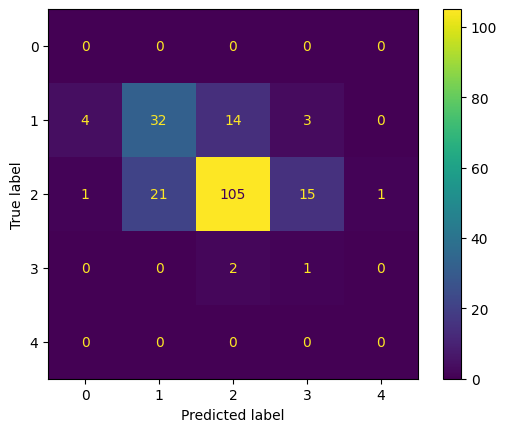

In [68]:
cm_catboost = confusion_matrix(preds_catboost, y_test)
disp = ConfusionMatrixDisplay(cm_catboost)
disp.plot()
plt.show()

In [67]:
## Stacked model


df_probas_train = pd.concat([pd.DataFrame(preds_probas_train_catboost, columns = [f'catboost_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_train_lgbm, columns = [f'lgbm_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_train_xgb, columns = [f'xgb_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_train_rf, columns = [f'rf_{i}' for i in range(6)])], axis = 1)

df_probas_test = pd.concat([pd.DataFrame(preds_probas_catboost, columns = [f'catboost_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_lgbm, columns = [f'lgbm_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_xgb, columns = [f'xgb_{i}' for i in range(6)]),
pd.DataFrame(preds_probas_rf, columns = [f'rf_{i}' for i in range(6)])], axis = 1)

linear_model = LogisticRegression(penalty='l2', solver = 'saga', C = 0.05)
nn_ensamble = MLPClassifier()
nn_ensamble.fit(df_probas_train, y_train)
preds = nn_ensamble.predict(df_probas_test)
accuracy_score(preds, y_test)


0.6884422110552764

In [49]:
def objective_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.00001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 4000),
        # Add other hyperparameters as needed
    }

    model = XGBClassifier(enable_categorical=True, *params)
    model.fit(x_train_df, y_train)
    predictions = model.predict(x_test_df)
    accuracy = accuracy_score(predictions, y_test)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective_xgb, n_trials=40)

[I 2023-11-22 01:14:25,609] A new study created in memory with name: no-name-43af904e-e182-4b65-878b-3c6e33823390
[I 2023-11-22 01:14:31,581] Trial 0 finished with value: 0.6633165829145728 and parameters: {'max_depth': 7, 'learning_rate': 0.00041191619466161573, 'n_estimators': 1724}. Best is trial 0 with value: 0.6633165829145728.
[I 2023-11-22 01:14:36,982] Trial 1 finished with value: 0.6633165829145728 and parameters: {'max_depth': 9, 'learning_rate': 0.5469093563352341, 'n_estimators': 1475}. Best is trial 0 with value: 0.6633165829145728.
[I 2023-11-22 01:14:41,759] Trial 2 finished with value: 0.6633165829145728 and parameters: {'max_depth': 7, 'learning_rate': 0.00030446335555104714, 'n_estimators': 2263}. Best is trial 0 with value: 0.6633165829145728.
[I 2023-11-22 01:14:47,193] Trial 3 finished with value: 0.6633165829145728 and parameters: {'max_depth': 3, 'learning_rate': 0.00046054661740183516, 'n_estimators': 1735}. Best is trial 0 with value: 0.6633165829145728.
[I 202

In [103]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 4000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.3),

        # Add other hyperparameters as needed
    }

    model = CatBoostClassifier(**params, silent=True, cat_features=CAT_VARS)
    model.fit(x_train_df, y_train)
    predictions = model.predict(x_test_df)
    accuracy = accuracy_score(predictions, y_test)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40)

[I 2023-11-21 00:56:35,036] A new study created in memory with name: no-name-ec4584d2-978c-4092-a653-3a3de7e43fe9
[I 2023-11-21 01:00:46,867] Trial 0 finished with value: 0.6582914572864321 and parameters: {'iterations': 1651, 'depth': 9, 'learning_rate': 0.29253428889453814}. Best is trial 0 with value: 0.6582914572864321.
[I 2023-11-21 01:03:14,127] Trial 1 finished with value: 0.628140703517588 and parameters: {'iterations': 3145, 'depth': 7, 'learning_rate': 0.2847158387967534}. Best is trial 0 with value: 0.6582914572864321.
[I 2023-11-21 01:04:08,335] Trial 2 finished with value: 0.592964824120603 and parameters: {'iterations': 1147, 'depth': 7, 'learning_rate': 0.00564545419395236}. Best is trial 0 with value: 0.6582914572864321.
[I 2023-11-21 01:05:22,181] Trial 3 finished with value: 0.6532663316582915 and parameters: {'iterations': 2843, 'depth': 5, 'learning_rate': 0.18430791659872514}. Best is trial 0 with value: 0.6582914572864321.
[I 2023-11-21 01:05:48,131] Trial 4 finis

KeyboardInterrupt: 

In [107]:
params = {'iterations': 1786, 'depth': 9, 'learning_rate': 0.29666741441737854}
model = CatBoostClassifier(cat_features=CAT_VARS, **params)
model.fit(x_train_df, y_train)
preds_catboost = model.predict(x_test_df)
print(accuracy_score(preds_catboost, y_test))

0:	learn: 1.3890641	total: 231ms	remaining: 6m 52s
1:	learn: 1.2425489	total: 403ms	remaining: 5m 59s
2:	learn: 1.1573241	total: 606ms	remaining: 6m
3:	learn: 1.0952804	total: 792ms	remaining: 5m 53s
4:	learn: 1.0324755	total: 954ms	remaining: 5m 39s
5:	learn: 0.9940243	total: 1.19s	remaining: 5m 52s
6:	learn: 0.9601732	total: 1.42s	remaining: 5m 59s
7:	learn: 0.9307766	total: 1.61s	remaining: 5m 57s
8:	learn: 0.8861545	total: 1.86s	remaining: 6m 6s
9:	learn: 0.8533201	total: 2.08s	remaining: 6m 8s
10:	learn: 0.8249566	total: 2.31s	remaining: 6m 12s
11:	learn: 0.8077871	total: 2.57s	remaining: 6m 19s
12:	learn: 0.7834747	total: 2.77s	remaining: 6m 18s
13:	learn: 0.7685157	total: 2.99s	remaining: 6m 18s
14:	learn: 0.7598201	total: 3.23s	remaining: 6m 21s
15:	learn: 0.7482444	total: 3.45s	remaining: 6m 21s
16:	learn: 0.7339554	total: 3.7s	remaining: 6m 25s
17:	learn: 0.7182938	total: 3.92s	remaining: 6m 25s
18:	learn: 0.7067983	total: 4.11s	remaining: 6m 21s
19:	learn: 0.6945239	total: 4

In [12]:
#### Recommendation system

user_input = " I want to go to the gym"



def analyze_sentiment(text, language_model):
    doc = language_model(text)
    text = " ".join([token.lemma_ for token in doc if not token.is_stop])

    blob = TextBlob(text)
    
    return blob.sentiment


polarity = analyze_sentiment(user_input, nlp_en).polarity

['I', 'want', 'to', 'go', 'to', 'the', 'gym']

In [54]:
def text_preprocess(text):
    ## Language detection
    lang = detect(text)
    
    ## Replace numbers
    text = replace_numbers(text)
    ## Replacing characters
    text = text.lower()
    text = unidecode(text)
    ## Tokenization
    if lang in ['en','es','fr']:
        tokens = regexp.tokenize(text)

    
    ## Stop words
    stopwords_en = nltk.corpus.stopwords.words("english")
    stopwords_es = nltk.corpus.stopwords.words("spanish")
    stopwords_fr = nltk.corpus.stopwords.words("french")
    if lang == 'en':
        new_tokens = [i for i in tokens if i not in stopwords_en]
    elif lang == 'es':
        new_tokens = [i for i in tokens if i not in stopwords_es]
    elif lang == 'fr':
        new_tokens = [i for i in tokens if i not in stopwords_fr]
    ## Join text

    full_text = ' '.join(new_tokens)
    
    return full_text

cleaned_text = text_preprocess(user_input)
user_matrix = vect.transform([cleaned_text]).toarray()
song_matrix = vect.transform(x_train['lyrics']).toarray()
cosine_similarity(user_matrix, song_matrix)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.14282313e-01,
        2.87668741e-01, 1.40735730e-02, 1.97239982e-02, 6.45317875e-02,
        6.00693086e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.47970519e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.14352552e-02, 0.00000000e+00, 4.28682615e-02, 2.45139576e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.17188943e-02, 4.85029438e-02, 1.13359422e-01,
        0.00000000e+00, 9.20217366e-02, 3.67434032e-02, 0.00000000e+00,
        0.00000000e+00, 3.31291276e-03, 5.32640291e-02, 4.21402064e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.91817024e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.71764124e-01, 1.70629518e-02, 3.75448117e-02, 6.34767528e-02,
        0.00000000e+00, 3.57422241e-02, 0.00000000e+00, 6.33266016e-03,
        3.59476432e-02, 0.00000000e+00, 0.00000000e+00, 0.000000

In [51]:
song_matrix.shape

(594, 1000)

In [38]:
stopwords_en = nltk.corpus.stopwords.words("english")
stopwords_en

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each